<a href="https://colab.research.google.com/github/ehpub/statistics_python/blob/main/%ED%86%B5%EA%B3%84_with_python_%EC%A4%91%EC%8B%AC_%EA%B7%B9%ED%95%9C_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[설명](https://ehpub.co.kr/%ec%a4%91%ec%8b%ac-%ea%b7%b9%ed%95%9c-%ec%a0%95%eb%a6%ac-%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9c%bc%eb%a1%9c-%eb%8b%a4%eb%a3%a8%eb%8a%94-%ed%86%b5%ea%b3%84/)

In [19]:
import scipy as sp
from scipy import stats
from scipy.stats import norm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 중심 극한 정리

같은 확률 분포를 갖는 독립 확률 변수의 분포는 n(확률 변수의 개수)이 충분히 크면 정규분포에 가까워진다.

### 균등 분포 함수 만들기

확률 밀도 함수 - uniform_pdf

누적 밀도 함수 - uniform_cdf

In [9]:
def uniform_pdf(x,min_v, max_v):
  max_p1 = max_v+1
  if min_v<= x < max_p1:
    return 1/(max_p1 - min_v)
  return 0

In [10]:
for i in range(-3,10):
  print(f"P({i}) = {uniform_pdf(i,1,6)}")

P(-3) = 0
P(-2) = 0
P(-1) = 0
P(0) = 0
P(1) = 0.16666666666666666
P(2) = 0.16666666666666666
P(3) = 0.16666666666666666
P(4) = 0.16666666666666666
P(5) = 0.16666666666666666
P(6) = 0.16666666666666666
P(7) = 0
P(8) = 0
P(9) = 0


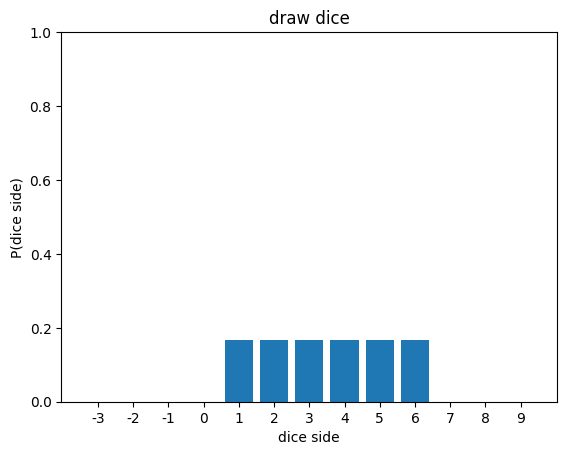

In [47]:
dice_sides = range(-3,10)
dss = [str(i) for i in dice_sides]
px = [uniform_pdf(i,1,6) for i in dice_sides]
plt.bar(dss,px)
plt.xlabel('dice side')
plt.ylabel('P(dice side)')
plt.ylim(0,1)
plt.title('draw dice')
plt.show()

## 주사위 던지기 실험

In [31]:
def bernouli_trial(p):
  return 1 if np.random.random()<p else 0

In [32]:
def draw_dice(n=1000,side=1):
  p = uniform_pdf(side,1,6)
  cnt = 0
  for _ in range(n):
    re = bernouli_trial(p)
    if re == 1:
      cnt+=1
  return cnt

In [33]:
for _ in range(10):
  print(draw_dice())

172
164
168
147
160
174
165
153
159
160


## 실험 횟수에 따른 분포 비교하기

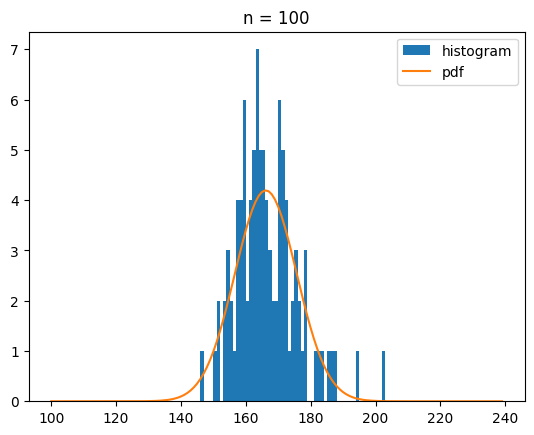

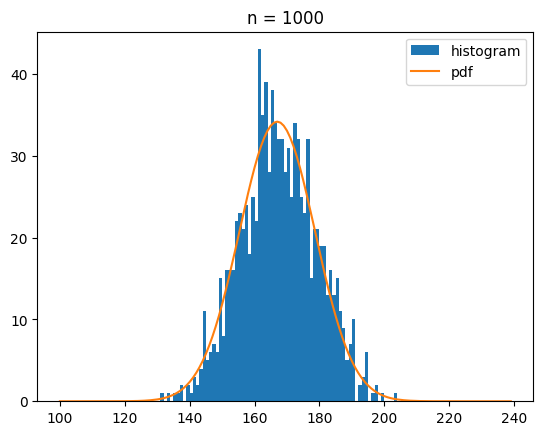

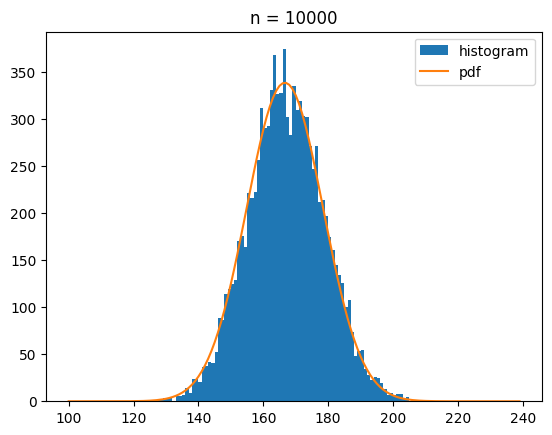

In [46]:
bins = range(100,240)
for n in [100,1000,10000]:
  ecnt = np.array([draw_dice() for _ in range(n)])
  s_mean = ecnt.mean()
  s_std = ecnt.std()
  plt.hist(ecnt,bins=bins,label='histogram')
  y = norm.pdf(bins,s_mean,s_std)*n
  plt.plot(bins,y,label='pdf')
  plt.legend()
  plt.title(f'n = {n}')
  plt.show()